Pré-processamento realizado em Processing.ipynb

# Bibliotecas

In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy import signal
import ml_time_series as mls
import timeit
from datetime import datetime
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import utils

%matplotlib notebook

In [16]:
def Stacker(files_,t):
    
    #Lê dados do arquivo e remove janela
    Xc = np.load('preproc/'+files_[3])
    Xc = Xc[:-49]
    #print t
    #print len(Xc)
    
    #Aplica Hstack nos dados
    for j in range(0,len(files_)-1):
        Xci = np.load('preproc/'+files_[j])
        #print len(Xci)
        Xc = np.hstack((Xc.reshape(Xc.shape),Xci.reshape(Xci.shape)))
        
    #Labeling the PKS level    
    #C = (np.ones(len(Xc))*l).reshape((len(Xc),1))
    #Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1))))    
    
    # Salving in file on the folder <preproc/labeled>
    np.save('preproc/labeled/'+t+'_hs', Xc, allow_pickle=False)
    
    if "v" in t:
        DATAv_hs.append(t+'_hs.npy')
    else:
        DATA_hs.append(t+'_hs.npy')

In [17]:
files = os.listdir('C:\Users\jorge.junior\Documents\GitHub\PKS\preproc')
files

['labeled',
 'pd06.1.1_fft.npy',
 'pd06.1.1_filt.npy',
 'pd06.1.1_rms.npy',
 'pd06.1.1_std.npy',
 'pd06.1.2_fft.npy',
 'pd06.1.2_filt.npy',
 'pd06.1.2_rms.npy',
 'pd06.1.2_std.npy',
 'pd06.1.3_fft.npy',
 'pd06.1.3_filt.npy',
 'pd06.1.3_rms.npy',
 'pd06.1.3_std.npy',
 'pd07.1.1_fft.npy',
 'pd07.1.1_filt.npy',
 'pd07.1.1_rms.npy',
 'pd07.1.1_std.npy',
 'pd07.1.2_fft.npy',
 'pd07.1.2_filt.npy',
 'pd07.1.2_rms.npy',
 'pd07.1.2_std.npy',
 'pd07.1.3_fft.npy',
 'pd07.1.3_filt.npy',
 'pd07.1.3_rms.npy',
 'pd07.1.3_std.npy',
 'pd09.2.1_fft.npy',
 'pd09.2.1_filt.npy',
 'pd09.2.1_rms.npy',
 'pd09.2.1_std.npy',
 'pd09.2.2_fft.npy',
 'pd09.2.2_filt.npy',
 'pd09.2.2_rms.npy',
 'pd09.2.2_std.npy',
 'pd09.2.3_fft.npy',
 'pd09.2.3_filt.npy',
 'pd09.2.3_rms.npy',
 'pd09.2.3_std.npy',
 'pd17.2.1_fft.npy',
 'pd17.2.1_filt.npy',
 'pd17.2.1_rms.npy',
 'pd17.2.1_std.npy',
 'pd17.2.2_fft.npy',
 'pd17.2.2_filt.npy',
 'pd17.2.2_rms.npy',
 'pd17.2.2_std.npy',
 'pd17.2.3_fft.npy',
 'pd17.2.3_filt.npy',
 'pd17.2.3

In [18]:
files_ =[['pd06.1.1_fft.npy', 'pd06.1.1_filt.npy', 'pd06.1.1_rms.npy', 'pd06.1.1_std.npy'],
        ['pd06.1.2_fft.npy', 'pd06.1.2_filt.npy', 'pd06.1.2_rms.npy', 'pd06.1.2_std.npy'],
        ['pd06.1.3_fft.npy', 'pd06.1.3_filt.npy', 'pd06.1.3_rms.npy', 'pd06.1.3_std.npy'],
        ['pd07.1.1_fft.npy', 'pd07.1.1_filt.npy', 'pd07.1.1_rms.npy', 'pd07.1.1_std.npy'],
        ['pd07.1.2_fft.npy', 'pd07.1.2_filt.npy', 'pd07.1.2_rms.npy', 'pd07.1.2_std.npy'],
        ['pd07.1.3_fft.npy', 'pd07.1.3_filt.npy', 'pd07.1.3_rms.npy', 'pd07.1.3_std.npy'],
        ['pd09.2.1_fft.npy', 'pd09.2.1_filt.npy', 'pd09.2.1_rms.npy', 'pd09.2.1_std.npy'],
        ['pd09.2.2_fft.npy', 'pd09.2.2_filt.npy', 'pd09.2.2_rms.npy', 'pd09.2.2_std.npy'],
        ['pd09.2.3_fft.npy', 'pd09.2.3_filt.npy', 'pd09.2.3_rms.npy', 'pd09.2.3_std.npy'],
        ['pd17.2.1_fft.npy', 'pd17.2.1_filt.npy', 'pd17.2.1_rms.npy', 'pd17.2.1_std.npy'],
        ['pd17.2.2_fft.npy', 'pd17.2.2_filt.npy', 'pd17.2.2_rms.npy', 'pd17.2.2_std.npy'],
        ['pd17.2.3_fft.npy', 'pd17.2.3_filt.npy', 'pd17.2.3_rms.npy', 'pd17.2.3_std.npy'],
        ['pe06.1.1_fft.npy', 'pe06.1.1_filt.npy', 'pe06.1.1_rms.npy', 'pe06.1.1_std.npy'],
        ['pe06.1.2_fft.npy', 'pe06.1.2_filt.npy', 'pe06.1.2_rms.npy', 'pe06.1.2_std.npy'],
        ['pe06.1.3_fft.npy', 'pe06.1.3_filt.npy', 'pe06.1.3_rms.npy', 'pe06.1.3_std.npy'],
        ['pe07.1.1_fft.npy', 'pe07.1.1_filt.npy', 'pe07.1.1_rms.npy', 'pe07.1.1_std.npy'],
        ['pe07.1.2_fft.npy', 'pe07.1.2_filt.npy', 'pe07.1.2_rms.npy', 'pe07.1.2_std.npy'],
        ['pe07.1.3_fft.npy', 'pe07.1.3_filt.npy', 'pe07.1.3_rms.npy', 'pe07.1.3_std.npy'],
        ['pe09.2.1_fft.npy', 'pe09.2.1_filt.npy', 'pe09.2.1_rms.npy', 'pe09.2.1_std.npy'],
        ['pe09.2.2_fft.npy', 'pe09.2.2_filt.npy', 'pe09.2.2_rms.npy', 'pe09.2.2_std.npy'],
        ['pe09.2.3_fft.npy', 'pe09.2.3_filt.npy', 'pe09.2.3_rms.npy', 'pe09.2.3_std.npy'],
        ['pe17.2.1_fft.npy', 'pe17.2.1_filt.npy', 'pe17.2.1_rms.npy', 'pe17.2.1_std.npy'],
        ['pe17.2.2_fft.npy', 'pe17.2.2_filt.npy', 'pe17.2.2_rms.npy', 'pe17.2.2_std.npy'],
        ['pe17.2.3_fft.npy', 'pe17.2.3_filt.npy', 'pe17.2.3_rms.npy', 'pe17.2.3_std.npy'],
        ['pr06.1.1_filt.npy', 'pr06.1.1_rms.npy', 'pr06.1.1_fft.npy', 'pr06.1.1_std.npy'], 
        ['pr06.1.2_filt.npy', 'pr06.1.2_rms.npy', 'pr06.1.2_fft.npy', 'pr06.1.2_std.npy'],
        ['pr06.1.3_filt.npy', 'pr06.1.3_rms.npy', 'pr06.1.3_fft.npy', 'pr06.1.3_std.npy'],
        ['pr06.2.1_filt.npy', 'pr06.2.1_rms.npy', 'pr06.2.1_fft.npy', 'pr06.2.1_std.npy'],
        ['pr06.2.2_filt.npy', 'pr06.2.2_rms.npy', 'pr06.2.2_fft.npy', 'pr06.2.2_std.npy'],
        ['pr06.2.3_filt.npy', 'pr06.2.3_rms.npy', 'pr06.2.3_fft.npy', 'pr06.2.3_std.npy'],
        ['pr07.1.1_filt.npy', 'pr07.1.1_rms.npy', 'pr07.1.1_fft.npy', 'pr07.1.1_std.npy'],
        ['pr07.1.2_filt.npy', 'pr07.1.2_rms.npy', 'pr07.1.2_fft.npy', 'pr07.1.2_std.npy'],
        ['pr07.1.3_filt.npy', 'pr07.1.3_rms.npy', 'pr07.1.3_fft.npy', 'pr07.1.3_std.npy'],
        ['pr09.1.1_filt.npy', 'pr09.1.1_rms.npy', 'pr09.1.1_fft.npy', 'pr09.1.1_std.npy'],
        ['pr09.1.2_filt.npy', 'pr09.1.2_rms.npy', 'pr09.1.2_fft.npy', 'pr09.1.2_std.npy'],
        ['pr09.1.3_filt.npy', 'pr09.1.3_rms.npy', 'pr09.1.3_fft.npy', 'pr09.1.3_std.npy'],
        ['pr09.2.1_filt.npy', 'pr09.2.1_rms.npy', 'pr09.2.1_fft.npy', 'pr09.2.1_std.npy'],
        ['pr09.2.2_filt.npy', 'pr09.2.2_rms.npy', 'pr09.2.2_fft.npy', 'pr09.2.2_std.npy'],
        ['pr09.2.3_filt.npy', 'pr09.2.3_rms.npy', 'pr09.2.3_fft.npy', 'pr09.2.3_std.npy'],
        ['pr17.1.1_filt.npy', 'pr17.1.1_rms.npy', 'pr17.1.1_fft.npy', 'pr17.1.1_std.npy'],
        ['pr17.1.2_filt.npy', 'pr17.1.2_rms.npy', 'pr17.1.2_fft.npy', 'pr17.1.2_std.npy'],
        ['pr17.1.3_filt.npy', 'pr17.1.3_rms.npy', 'pr17.1.3_fft.npy', 'pr17.1.3_std.npy'],
        ['pr17.2.1_filt.npy', 'pr17.2.1_rms.npy', 'pr17.2.1_fft.npy', 'pr17.2.1_std.npy'],
        ['pr17.2.2_filt.npy', 'pr17.2.2_rms.npy', 'pr17.2.2_fft.npy', 'pr17.2.2_std.npy'],
        ['pr17.2.3_filt.npy', 'pr17.2.3_rms.npy', 'pr17.2.3_fft.npy', 'pr17.2.3_std.npy'],
        ['pi06.1.1_filt.npy', 'pi06.1.1_rms.npy', 'pi06.1.1_fft.npy', 'pi06.1.1_std.npy'],
        ['pi06.1.2_filt.npy', 'pi06.1.2_rms.npy', 'pi06.1.2_fft.npy', 'pi06.1.2_std.npy'],
        ['pi06.1.3_filt.npy', 'pi06.1.3_rms.npy', 'pi06.1.3_fft.npy', 'pi06.1.3_std.npy'],
        ['pi07.2.1_filt.npy', 'pi07.2.1_rms.npy', 'pi07.2.1_fft.npy', 'pi07.2.1_std.npy'],
        ['pi07.2.2_filt.npy', 'pi07.2.2_rms.npy', 'pi07.2.2_fft.npy', 'pi07.2.2_std.npy'],
        ['pi07.2.3_filt.npy', 'pi07.2.3_rms.npy', 'pi07.2.3_fft.npy', 'pi07.2.3_std.npy'],
        ['pi09.1.1_filt.npy', 'pi09.1.1_rms.npy', 'pi09.1.1_fft.npy', 'pi09.1.1_std.npy'],
        ['pi09.1.2_filt.npy', 'pi09.1.2_rms.npy', 'pi09.1.2_fft.npy', 'pi09.1.2_std.npy'],
        ['pi09.1.3_filt.npy', 'pi09.1.3_rms.npy', 'pi09.1.3_fft.npy', 'pi09.1.3_std.npy'],
        ['pi17.1.1_filt.npy', 'pi17.1.1_rms.npy', 'pi17.1.1_fft.npy', 'pi17.1.1_std.npy'],
        ['pi17.1.2_filt.npy', 'pi17.1.2_rms.npy', 'pi17.1.2_fft.npy', 'pi17.1.2_std.npy'],
        ['pi17.1.3_filt.npy', 'pi17.1.3_rms.npy', 'pi17.1.3_fft.npy', 'pi17.1.3_std.npy']]

files_ =[['pr06.1.1_filt.npy', 'pr06.1.1_rms.npy', 'pr06.1.1_fft.npy', 'pr06.1.1_std.npy'], 
        ['pr06.1.2_filt.npy', 'pr06.1.2_rms.npy', 'pr06.1.2_fft.npy', 'pr06.1.2_std.npy'],
        ['pr06.1.3_filt.npy', 'pr06.1.3_rms.npy', 'pr06.1.3_fft.npy', 'pr06.1.3_std.npy'],
        ['pr06.2.1_filt.npy', 'pr06.2.1_rms.npy', 'pr06.2.1_fft.npy', 'pr06.2.1_std.npy'],
        ['pr06.2.2_filt.npy', 'pr06.2.2_rms.npy', 'pr06.2.2_fft.npy', 'pr06.2.2_std.npy'],
        ['pr06.2.3_filt.npy', 'pr06.2.3_rms.npy', 'pr06.2.3_fft.npy', 'pr06.2.3_std.npy'],
        ['pr07.1.1_filt.npy', 'pr07.1.1_rms.npy', 'pr07.1.1_fft.npy', 'pr07.1.1_std.npy'],
        ['pr07.1.2_filt.npy', 'pr07.1.2_rms.npy', 'pr07.1.2_fft.npy', 'pr07.1.2_std.npy'],
        ['pr07.1.3_filt.npy', 'pr07.1.3_rms.npy', 'pr07.1.3_fft.npy', 'pr07.1.3_std.npy'],
        ['pr09.1.1_filt.npy', 'pr09.1.1_rms.npy', 'pr09.1.1_fft.npy', 'pr09.1.1_std.npy'],
        ['pr09.1.2_filt.npy', 'pr09.1.2_rms.npy', 'pr09.1.2_fft.npy', 'pr09.1.2_std.npy'],
        ['pr09.1.3_filt.npy', 'pr09.1.3_rms.npy', 'pr09.1.3_fft.npy', 'pr09.1.3_std.npy'],
        ['pr09.2.1_filt.npy', 'pr09.2.1_rms.npy', 'pr09.2.1_fft.npy', 'pr09.2.1_std.npy'],
        ['pr09.2.2_filt.npy', 'pr09.2.2_rms.npy', 'pr09.2.2_fft.npy', 'pr09.2.2_std.npy'],
        ['pr09.2.3_filt.npy', 'pr09.2.3_rms.npy', 'pr09.2.3_fft.npy', 'pr09.2.3_std.npy'],
        ['pr17.1.1_filt.npy', 'pr17.1.1_rms.npy', 'pr17.1.1_fft.npy', 'pr17.1.1_std.npy'],
        ['pr17.1.2_filt.npy', 'pr17.1.2_rms.npy', 'pr17.1.2_fft.npy', 'pr17.1.2_std.npy'],
        ['pr17.1.3_filt.npy', 'pr17.1.3_rms.npy', 'pr17.1.3_fft.npy', 'pr17.1.3_std.npy'],
        ['pr17.2.1_filt.npy', 'pr17.2.1_rms.npy', 'pr17.2.1_fft.npy', 'pr17.2.1_std.npy'],
        ['pr17.2.2_filt.npy', 'pr17.2.2_rms.npy', 'pr17.2.2_fft.npy', 'pr17.2.2_std.npy'],
        ['pr17.2.3_filt.npy', 'pr17.2.3_rms.npy', 'pr17.2.3_fft.npy', 'pr17.2.3_std.npy'],
        ['pi06.1.1_filt.npy', 'pi06.1.1_rms.npy', 'pi06.1.1_fft.npy', 'pi06.1.1_std.npy'],
        ['pi06.1.2_filt.npy', 'pi06.1.2_rms.npy', 'pi06.1.2_fft.npy', 'pi06.1.2_std.npy'],
        ['pi06.1.3_filt.npy', 'pi06.1.3_rms.npy', 'pi06.1.3_fft.npy', 'pi06.1.3_std.npy'],
        ['pi07.2.1_filt.npy', 'pi07.2.1_rms.npy', 'pi07.2.1_fft.npy', 'pi07.2.1_std.npy'],
        ['pi07.2.2_filt.npy', 'pi07.2.2_rms.npy', 'pi07.2.2_fft.npy', 'pi07.2.2_std.npy'],
        ['pi07.2.3_filt.npy', 'pi07.2.3_rms.npy', 'pi07.2.3_fft.npy', 'pi07.2.3_std.npy'],
        ['pi09.1.1_filt.npy', 'pi09.1.1_rms.npy', 'pi09.1.1_fft.npy', 'pi09.1.1_std.npy'],
        ['pi09.1.2_filt.npy', 'pi09.1.2_rms.npy', 'pi09.1.2_fft.npy', 'pi09.1.2_std.npy'],
        ['pi09.1.3_filt.npy', 'pi09.1.3_rms.npy', 'pi09.1.3_fft.npy', 'pi09.1.3_std.npy'],
        ['pi17.1.1_filt.npy', 'pi17.1.1_rms.npy', 'pi17.1.1_fft.npy', 'pi17.1.1_std.npy'],
        ['pi17.1.2_filt.npy', 'pi17.1.2_rms.npy', 'pi17.1.2_fft.npy', 'pi17.1.2_std.npy'],
        ['pi17.1.3_filt.npy', 'pi17.1.3_rms.npy', 'pi17.1.3_fft.npy', 'pi17.1.3_std.npy']]

#Com Wavelets


files_ =[['pr06.1.1_filt.npy', 'pr06.1.1_rms.npy', 'pr06.1.1_fft.npy', 'pr06.1.1_wlt.npy', 'pr06.1.1_std.npy'], 
        ['pr06.1.2_filt.npy', 'pr06.1.2_rms.npy', 'pr06.1.2_fft.npy', 'pr06.1.2_wlt.npy', 'pr06.1.2_std.npy'],
        ['pr06.1.3_filt.npy', 'pr06.1.3_rms.npy', 'pr06.1.3_fft.npy', 'pr06.1.3_wlt.npy', 'pr06.1.3_std.npy'],
        ['pr06.2.1_filt.npy', 'pr06.2.1_rms.npy', 'pr06.2.1_fft.npy', 'pr06.2.1_wlt.npy', 'pr06.2.1_std.npy'],
        ['pr06.2.2_filt.npy', 'pr06.2.2_rms.npy', 'pr06.2.2_fft.npy', 'pr06.2.2_wlt.npy', 'pr06.2.2_std.npy'],
        ['pr06.2.3_filt.npy', 'pr06.2.3_rms.npy', 'pr06.2.3_fft.npy', 'pr06.2.3_wlt.npy', 'pr06.2.3_std.npy'],
        ['pr07.1.1_filt.npy', 'pr07.1.1_rms.npy', 'pr07.1.1_fft.npy', 'pr07.1.1_wlt.npy', 'pr07.1.1_std.npy'],
        ['pr07.1.2_filt.npy', 'pr07.1.2_rms.npy', 'pr07.1.2_fft.npy', 'pr07.1.2_wlt.npy', 'pr07.1.2_std.npy'],
        ['pr07.1.3_filt.npy', 'pr07.1.3_rms.npy', 'pr07.1.3_fft.npy', 'pr07.1.3_wlt.npy', 'pr07.1.3_std.npy'],
        ['pr09.1.1_filt.npy', 'pr09.1.1_rms.npy', 'pr09.1.1_fft.npy', 'pr09.1.1_wlt.npy', 'pr09.1.1_std.npy'],
        ['pr09.1.2_filt.npy', 'pr09.1.2_rms.npy', 'pr09.1.2_fft.npy', 'pr09.1.2_wlt.npy', 'pr09.1.2_std.npy'],
        ['pr09.1.3_filt.npy', 'pr09.1.3_rms.npy', 'pr09.1.3_fft.npy', 'pr09.1.3_wlt.npy', 'pr09.1.3_std.npy'],
        ['pr09.2.1_filt.npy', 'pr09.2.1_rms.npy', 'pr09.2.1_fft.npy', 'pr09.2.1_wlt.npy', 'pr09.2.1_std.npy'],
        ['pr09.2.2_filt.npy', 'pr09.2.2_rms.npy', 'pr09.2.2_fft.npy', 'pr09.2.2_wlt.npy', 'pr09.2.2_std.npy'],
        ['pr09.2.3_filt.npy', 'pr09.2.3_rms.npy', 'pr09.2.3_fft.npy', 'pr09.2.3_wlt.npy', 'pr09.2.3_std.npy'],
        ['pr17.1.1_filt.npy', 'pr17.1.1_rms.npy', 'pr17.1.1_fft.npy', 'pr17.1.1_wlt.npy', 'pr17.1.1_std.npy'],
        ['pr17.1.2_filt.npy', 'pr17.1.2_rms.npy', 'pr17.1.2_fft.npy', 'pr17.1.2_wlt.npy', 'pr17.1.2_std.npy'],
        ['pr17.1.3_filt.npy', 'pr17.1.3_rms.npy', 'pr17.1.3_fft.npy', 'pr17.1.3_wlt.npy', 'pr17.1.3_std.npy'],
        ['pr17.2.1_filt.npy', 'pr17.2.1_rms.npy', 'pr17.2.1_fft.npy', 'pr17.2.1_wlt.npy', 'pr17.2.1_std.npy'],
        ['pr17.2.2_filt.npy', 'pr17.2.2_rms.npy', 'pr17.2.2_fft.npy', 'pr17.2.2_wlt.npy', 'pr17.2.2_std.npy'],
        ['pr17.2.3_filt.npy', 'pr17.2.3_rms.npy', 'pr17.2.3_fft.npy', 'pr17.2.3_wlt.npy', 'pr17.2.3_std.npy'],
        ['pi06.1.1_filt.npy', 'pi06.1.1_rms.npy', 'pi06.1.1_fft.npy', 'pi06.1.1_wlt.npy', 'pi06.1.1_std.npy'],
        ['pi06.1.2_filt.npy', 'pi06.1.2_rms.npy', 'pi06.1.2_fft.npy', 'pi06.1.2_wlt.npy', 'pi06.1.2_std.npy'],
        ['pi06.1.3_filt.npy', 'pi06.1.3_rms.npy', 'pi06.1.3_fft.npy', 'pi06.1.3_wlt.npy', 'pi06.1.3_std.npy'],
        ['pi07.2.1_filt.npy', 'pi07.2.1_rms.npy', 'pi07.2.1_fft.npy', 'pi07.2.1_wlt.npy', 'pi07.2.1_std.npy'],
        ['pi07.2.2_filt.npy', 'pi07.2.2_rms.npy', 'pi07.2.2_fft.npy', 'pi07.2.2_wlt.npy', 'pi07.2.2_std.npy'],
        ['pi07.2.3_filt.npy', 'pi07.2.3_rms.npy', 'pi07.2.3_fft.npy', 'pi07.2.3_wlt.npy', 'pi07.2.3_std.npy'],
        ['pi09.1.1_filt.npy', 'pi09.1.1_rms.npy', 'pi09.1.1_fft.npy', 'pi09.1.1_wlt.npy', 'pi09.1.1_std.npy'],
        ['pi09.1.2_filt.npy', 'pi09.1.2_rms.npy', 'pi09.1.2_fft.npy', 'pi09.1.2_wlt.npy', 'pi09.1.2_std.npy'],
        ['pi09.1.3_filt.npy', 'pi09.1.3_rms.npy', 'pi09.1.3_fft.npy', 'pi09.1.3_wlt.npy', 'pi09.1.3_std.npy'],
        ['pi17.1.1_filt.npy', 'pi17.1.1_rms.npy', 'pi17.1.1_fft.npy', 'pi17.1.1_wlt.npy', 'pi17.1.1_std.npy'],
        ['pi17.1.2_filt.npy', 'pi17.1.2_rms.npy', 'pi17.1.2_fft.npy', 'pi17.1.2_wlt.npy', 'pi17.1.2_std.npy'],
        ['pi17.1.3_filt.npy', 'pi17.1.3_rms.npy', 'pi17.1.3_fft.npy', 'pi17.1.3_wlt.npy', 'pi17.1.3_std.npy']]


In [19]:
#Carregando arquivos para treino e teste

#Com não parkinsonianos
#files_ = [['p1_std', 'p1_rms', 'p1_filt'],['p2_std', 'p2_rms', 'p2_filt'],['p3_std', 'p3_rms', 'p3_filt'],
#          ['p5_std', 'p5_rms', 'p5_filt'],['c1_std', 'c1_rms', 'c1_filt'],['c3_std', 'c3_rms', 'c3_filt'],
#          ['p4_std', 'p4_rms', 'p4_filt'],['p6_std', 'p6_rms', 'p6_filt']]

#Sem não parkinsonianos
#files_ = [['p1_std', 'p1_rms', 'p1_filt'],['p2_std', 'p2_rms', 'p2_filt'],['p3_std', 'p3_rms', 'p3_filt'],
#          ['p5_std', 'p5_rms', 'p5_filt'],['p4_std', 'p4_rms', 'p4_filt'],['p6_std', 'p6_rms', 'p6_filt']]

#files_ = [['pr06.1_std', 'pr06.1_rms', 'pr06.1_filt'],['pr06.2_std', 'pr06.2_rms', 'pr06.2_filt'],
#          ['pr07.1_std', 'pr07.1_rms', 'pr07.1_filt'],['pr09.1_std', 'pr09.1_rms', 'pr09.1_filt'],['pr09.2_std', 'pr09.2_rms', 'pr09.2_filt'],
#          ['pr17.1_std', 'pr17.1_rms', 'pr17.1_filt'],['pr17.2_std', 'pr17.2_rms', 'pr17.2_filt']]



DATA_hs = []

In [20]:
filesv_ = [['pdv06.2.1_fft.npy', 'pdv06.2.1_filt.npy', 'pdv06.2.1_rms.npy', 'pdv06.2.1_std.npy'],
           ['pdv06.2.2_fft.npy', 'pdv06.2.2_filt.npy', 'pdv06.2.2_rms.npy', 'pdv06.2.2_std.npy'],
           ['pdv06.2.3_fft.npy', 'pdv06.2.3_filt.npy', 'pdv06.2.3_rms.npy', 'pdv06.2.3_std.npy'],
           ['pdv07.2.1_fft.npy', 'pdv07.2.1_filt.npy', 'pdv07.2.1_rms.npy', 'pdv07.2.1_std.npy'],
           ['pdv07.2.2_fft.npy', 'pdv07.2.2_filt.npy', 'pdv07.2.2_rms.npy', 'pdv07.2.2_std.npy'],
           ['pdv07.2.3_fft.npy', 'pdv07.2.3_filt.npy', 'pdv07.2.3_rms.npy', 'pdv07.2.3_std.npy'],
           ['pdv09.3.1_fft.npy', 'pdv09.3.1_filt.npy', 'pdv09.3.1_rms.npy', 'pdv09.3.1_std.npy'],
           ['pdv09.3.2_fft.npy', 'pdv09.3.2_filt.npy', 'pdv09.3.2_rms.npy', 'pdv09.3.2_std.npy'],
           ['pdv09.3.3_fft.npy', 'pdv09.3.3_filt.npy', 'pdv09.3.3_rms.npy', 'pdv09.3.3_std.npy'],
           ['pdv17.3.1_fft.npy', 'pdv17.3.1_filt.npy', 'pdv17.3.1_rms.npy', 'pdv17.3.1_std.npy'],
           ['pdv17.3.2_fft.npy', 'pdv17.3.2_filt.npy', 'pdv17.3.2_rms.npy', 'pdv17.3.2_std.npy'],
           ['pdv17.3.3_fft.npy', 'pdv17.3.3_filt.npy', 'pdv17.3.3_rms.npy', 'pdv17.3.3_std.npy'],
           ['pev06.2.1_fft.npy', 'pev06.2.1_filt.npy', 'pev06.2.1_rms.npy', 'pev06.2.1_std.npy'],
           ['pev06.2.2_fft.npy', 'pev06.2.2_filt.npy', 'pev06.2.2_rms.npy', 'pev06.2.2_std.npy'],
           ['pev06.2.3_fft.npy', 'pev06.2.3_filt.npy', 'pev06.2.3_rms.npy', 'pev06.2.3_std.npy'],
           ['pev07.2.1_fft.npy', 'pev07.2.1_filt.npy', 'pev07.2.1_rms.npy', 'pev07.2.1_std.npy'],
           ['pev07.2.2_fft.npy', 'pev07.2.2_filt.npy', 'pev07.2.2_rms.npy', 'pev07.2.2_std.npy'],
           ['pev07.2.3_fft.npy', 'pev07.2.3_filt.npy', 'pev07.2.3_rms.npy', 'pev07.2.3_std.npy'],
           ['pev09.3.1_fft.npy', 'pev09.3.1_filt.npy', 'pev09.3.1_rms.npy', 'pev09.3.1_std.npy'],
           ['pev09.3.2_fft.npy', 'pev09.3.2_filt.npy', 'pev09.3.2_rms.npy', 'pev09.3.2_std.npy'],
           ['pev09.3.3_fft.npy', 'pev09.3.3_filt.npy', 'pev09.3.3_rms.npy', 'pev09.3.3_std.npy'],
           ['pev17.3.1_fft.npy', 'pev17.3.1_filt.npy', 'pev17.3.1_rms.npy', 'pev17.3.1_std.npy'],
           ['pev17.3.2_fft.npy', 'pev17.3.2_filt.npy', 'pev17.3.2_rms.npy', 'pev17.3.2_std.npy'],
           ['pev17.3.3_fft.npy', 'pev17.3.3_filt.npy', 'pev17.3.3_rms.npy', 'pev17.3.3_std.npy'],
           ['prv06.3.1_filt.npy', 'prv06.3.1_rms.npy', 'prv06.3.1_fft.npy', 'prv06.3.1_std.npy'],
           ['prv06.3.2_filt.npy', 'prv06.3.2_rms.npy', 'prv06.3.2_fft.npy', 'prv06.3.2_std.npy'],
           ['prv06.3.3_filt.npy', 'prv06.3.3_rms.npy', 'prv06.3.3_fft.npy', 'prv06.3.3_std.npy'],
           ['prv07.2.1_filt.npy', 'prv07.2.1_rms.npy', 'prv07.2.1_fft.npy', 'prv07.2.1_std.npy'],
           ['prv07.2.2_filt.npy', 'prv07.2.2_rms.npy', 'prv07.2.2_fft.npy', 'prv07.2.2_std.npy'],
           ['prv07.2.3_filt.npy', 'prv07.2.3_rms.npy', 'prv07.2.3_fft.npy', 'prv07.2.3_std.npy'],
           ['prv09.3.1_filt.npy', 'prv09.3.1_rms.npy', 'prv09.3.1_fft.npy', 'prv09.3.1_std.npy'],
           ['prv09.3.2_filt.npy', 'prv09.3.2_rms.npy', 'prv09.3.2_fft.npy', 'prv09.3.2_std.npy'],
           ['prv09.3.3_filt.npy', 'prv09.3.3_rms.npy', 'prv09.3.3_fft.npy', 'prv09.3.3_std.npy'],
           ['prv17.3.1_filt.npy', 'prv17.3.1_rms.npy', 'prv17.3.1_fft.npy', 'prv17.3.1_std.npy'],
           ['prv17.3.2_filt.npy', 'prv17.3.2_rms.npy', 'prv17.3.2_fft.npy', 'prv17.3.2_std.npy'],
           ['prv17.3.3_filt.npy', 'prv17.3.3_rms.npy', 'prv17.3.3_fft.npy', 'prv17.3.3_std.npy'],
           ['piv06.2.1_filt.npy', 'piv06.2.1_rms.npy', 'piv06.2.1_fft.npy', 'piv06.2.1_std.npy'],
           ['piv06.2.2_filt.npy', 'piv06.2.2_rms.npy', 'piv06.2.2_fft.npy', 'piv06.2.2_std.npy'],
           ['piv06.2.3_filt.npy', 'piv06.2.3_rms.npy', 'piv06.2.3_fft.npy', 'piv06.2.3_std.npy'],
           ['piv07.3.1_filt.npy', 'piv07.3.1_rms.npy', 'piv07.3.1_fft.npy', 'piv07.3.1_std.npy'],
           ['piv07.3.2_filt.npy', 'piv07.3.2_rms.npy', 'piv07.3.2_fft.npy', 'piv07.3.2_std.npy'],
           ['piv07.3.3_filt.npy', 'piv07.3.3_rms.npy', 'piv07.3.3_fft.npy', 'piv07.3.3_std.npy'],
           ['piv09.2.1_filt.npy', 'piv09.2.1_rms.npy', 'piv09.2.1_fft.npy', 'piv09.2.1_std.npy'],
           ['piv09.2.2_filt.npy', 'piv09.2.2_rms.npy', 'piv09.2.2_fft.npy', 'piv09.2.2_std.npy'],
           ['piv09.2.3_filt.npy', 'piv09.2.3_rms.npy', 'piv09.2.3_fft.npy', 'piv09.2.3_std.npy'],
           ['piv17.3.1_filt.npy', 'piv17.3.1_rms.npy', 'piv17.3.1_fft.npy', 'piv17.3.1_std.npy'],
           ['piv17.3.2_filt.npy', 'piv17.3.2_rms.npy', 'piv17.3.2_fft.npy', 'piv17.3.2_std.npy'],
           ['piv17.3.3_filt.npy', 'piv17.3.3_rms.npy', 'piv17.3.3_fft.npy', 'piv17.3.3_std.npy']]

filesv_ = [['prv06.3.1_filt.npy', 'prv06.3.1_rms.npy', 'prv06.3.1_fft.npy', 'prv06.3.1_std.npy'],
           ['prv06.3.2_filt.npy', 'prv06.3.2_rms.npy', 'prv06.3.2_fft.npy', 'prv06.3.2_std.npy'],
           ['prv06.3.3_filt.npy', 'prv06.3.3_rms.npy', 'prv06.3.3_fft.npy', 'prv06.3.3_std.npy'],
           ['prv07.2.1_filt.npy', 'prv07.2.1_rms.npy', 'prv07.2.1_fft.npy', 'prv07.2.1_std.npy'],
           ['prv07.2.2_filt.npy', 'prv07.2.2_rms.npy', 'prv07.2.2_fft.npy', 'prv07.2.2_std.npy'],
           ['prv07.2.3_filt.npy', 'prv07.2.3_rms.npy', 'prv07.2.3_fft.npy', 'prv07.2.3_std.npy'],
           ['prv09.3.1_filt.npy', 'prv09.3.1_rms.npy', 'prv09.3.1_fft.npy', 'prv09.3.1_std.npy'],
           ['prv09.3.2_filt.npy', 'prv09.3.2_rms.npy', 'prv09.3.2_fft.npy', 'prv09.3.2_std.npy'],
           ['prv09.3.3_filt.npy', 'prv09.3.3_rms.npy', 'prv09.3.3_fft.npy', 'prv09.3.3_std.npy'],
           ['prv17.3.1_filt.npy', 'prv17.3.1_rms.npy', 'prv17.3.1_fft.npy', 'prv17.3.1_std.npy'],
           ['prv17.3.2_filt.npy', 'prv17.3.2_rms.npy', 'prv17.3.2_fft.npy', 'prv17.3.2_std.npy'],
           ['prv17.3.3_filt.npy', 'prv17.3.3_rms.npy', 'prv17.3.3_fft.npy', 'prv17.3.3_std.npy'],
           ['piv06.2.1_filt.npy', 'piv06.2.1_rms.npy', 'piv06.2.1_fft.npy', 'piv06.2.1_std.npy'],
           ['piv06.2.2_filt.npy', 'piv06.2.2_rms.npy', 'piv06.2.2_fft.npy', 'piv06.2.2_std.npy'],
           ['piv06.2.3_filt.npy', 'piv06.2.3_rms.npy', 'piv06.2.3_fft.npy', 'piv06.2.3_std.npy'],
           ['piv07.3.1_filt.npy', 'piv07.3.1_rms.npy', 'piv07.3.1_fft.npy', 'piv07.3.1_std.npy'],
           ['piv07.3.2_filt.npy', 'piv07.3.2_rms.npy', 'piv07.3.2_fft.npy', 'piv07.3.2_std.npy'],
           ['piv07.3.3_filt.npy', 'piv07.3.3_rms.npy', 'piv07.3.3_fft.npy', 'piv07.3.3_std.npy'],
           ['piv09.2.1_filt.npy', 'piv09.2.1_rms.npy', 'piv09.2.1_fft.npy', 'piv09.2.1_std.npy'],
           ['piv09.2.2_filt.npy', 'piv09.2.2_rms.npy', 'piv09.2.2_fft.npy', 'piv09.2.2_std.npy'],
           ['piv09.2.3_filt.npy', 'piv09.2.3_rms.npy', 'piv09.2.3_fft.npy', 'piv09.2.3_std.npy'],
           ['piv17.3.1_filt.npy', 'piv17.3.1_rms.npy', 'piv17.3.1_fft.npy', 'piv17.3.1_std.npy'],
           ['piv17.3.2_filt.npy', 'piv17.3.2_rms.npy', 'piv17.3.2_fft.npy', 'piv17.3.2_std.npy'],
           ['piv17.3.3_filt.npy', 'piv17.3.3_rms.npy', 'piv17.3.3_fft.npy', 'piv17.3.3_std.npy']]

#Com Wavelets

filesv_ = [['prv06.3.1_filt.npy', 'prv06.3.1_rms.npy', 'prv06.3.1_fft.npy', 'prv06.3.1_fft.npy', 'prv06.3.1_std.npy'],
           ['prv06.3.2_filt.npy', 'prv06.3.2_rms.npy', 'prv06.3.2_fft.npy', 'prv06.3.2_fft.npy', 'prv06.3.2_std.npy'],
           ['prv06.3.3_filt.npy', 'prv06.3.3_rms.npy', 'prv06.3.3_fft.npy', 'prv06.3.3_fft.npy', 'prv06.3.3_std.npy'],
           ['prv07.2.1_filt.npy', 'prv07.2.1_rms.npy', 'prv07.2.1_fft.npy', 'prv07.2.1_fft.npy', 'prv07.2.1_std.npy'],
           ['prv07.2.2_filt.npy', 'prv07.2.2_rms.npy', 'prv07.2.2_fft.npy', 'prv07.2.2_fft.npy', 'prv07.2.2_std.npy'],
           ['prv07.2.3_filt.npy', 'prv07.2.3_rms.npy', 'prv07.2.3_fft.npy', 'prv07.2.3_fft.npy', 'prv07.2.3_std.npy'],
           ['prv09.3.1_filt.npy', 'prv09.3.1_rms.npy', 'prv09.3.1_fft.npy', 'prv09.3.1_fft.npy', 'prv09.3.1_std.npy'],
           ['prv09.3.2_filt.npy', 'prv09.3.2_rms.npy', 'prv09.3.2_fft.npy', 'prv09.3.2_fft.npy', 'prv09.3.2_std.npy'],
           ['prv09.3.3_filt.npy', 'prv09.3.3_rms.npy', 'prv09.3.3_fft.npy', 'prv09.3.3_fft.npy', 'prv09.3.3_std.npy'],
           ['prv17.3.1_filt.npy', 'prv17.3.1_rms.npy', 'prv17.3.1_fft.npy', 'prv17.3.1_fft.npy', 'prv17.3.1_std.npy'],
           ['prv17.3.2_filt.npy', 'prv17.3.2_rms.npy', 'prv17.3.2_fft.npy', 'prv17.3.2_fft.npy', 'prv17.3.2_std.npy'],
           ['prv17.3.3_filt.npy', 'prv17.3.3_rms.npy', 'prv17.3.3_fft.npy', 'prv17.3.3_fft.npy', 'prv17.3.3_std.npy'],
           ['piv06.2.1_filt.npy', 'piv06.2.1_rms.npy', 'piv06.2.1_fft.npy', 'piv06.2.1_fft.npy', 'piv06.2.1_std.npy'],
           ['piv06.2.2_filt.npy', 'piv06.2.2_rms.npy', 'piv06.2.2_fft.npy', 'piv06.2.2_fft.npy', 'piv06.2.2_std.npy'],
           ['piv06.2.3_filt.npy', 'piv06.2.3_rms.npy', 'piv06.2.3_fft.npy', 'piv06.2.3_fft.npy', 'piv06.2.3_std.npy'],
           ['piv07.3.1_filt.npy', 'piv07.3.1_rms.npy', 'piv07.3.1_fft.npy', 'piv07.3.1_fft.npy', 'piv07.3.1_std.npy'],
           ['piv07.3.2_filt.npy', 'piv07.3.2_rms.npy', 'piv07.3.2_fft.npy', 'piv07.3.2_fft.npy', 'piv07.3.2_std.npy'],
           ['piv07.3.3_filt.npy', 'piv07.3.3_rms.npy', 'piv07.3.3_fft.npy', 'piv07.3.3_fft.npy', 'piv07.3.3_std.npy'],
           ['piv09.2.1_filt.npy', 'piv09.2.1_rms.npy', 'piv09.2.1_fft.npy', 'piv09.2.1_fft.npy', 'piv09.2.1_std.npy'],
           ['piv09.2.2_filt.npy', 'piv09.2.2_rms.npy', 'piv09.2.2_fft.npy', 'piv09.2.2_fft.npy', 'piv09.2.2_std.npy'],
           ['piv09.2.3_filt.npy', 'piv09.2.3_rms.npy', 'piv09.2.3_fft.npy', 'piv09.2.3_fft.npy', 'piv09.2.3_std.npy'],
           ['piv17.3.1_filt.npy', 'piv17.3.1_rms.npy', 'piv17.3.1_fft.npy', 'piv17.3.1_fft.npy', 'piv17.3.1_std.npy'],
           ['piv17.3.2_filt.npy', 'piv17.3.2_rms.npy', 'piv17.3.2_fft.npy', 'piv17.3.2_fft.npy', 'piv17.3.2_std.npy'],
           ['piv17.3.3_filt.npy', 'piv17.3.3_rms.npy', 'piv17.3.3_fft.npy', 'piv17.3.3_fft.npy', 'piv17.3.3_std.npy']]

In [21]:
#Carregando arquivos para validação
#Com não parkinsonianos
#filesv_ = [['p1v_std', 'p1v_rms', 'p1v_filt'],['p2v_std', 'p2v_rms', 'p2v_filt'],['p3v_std', 'p3v_rms', 'p3v_filt'],
#          ['p5v_std', 'p5v_rms', 'p5v_filt'],['c1v_std', 'c1v_rms', 'c1v_filt'],['c3v_std', 'c3v_rms', 'c3v_filt'],
#          ['p4v_std', 'p4v_rms', 'p4v_filt'],['p6v_std', 'p6v_rms', 'p6v_filt']]

#Sem não parkinsonianos
#filesv_ = [['p1v_std', 'p1v_rms', 'p1v_filt'],['p2v_std', 'p2v_rms', 'p2v_filt'],['p3v_std', 'p3v_rms', 'p3v_filt'],
#          ['p5v_std', 'p5v_rms', 'p5v_filt'],['p4v_std', 'p4v_rms', 'p4v_filt'],['p6v_std', 'p6v_rms', 'p6v_filt']]

#filesv_ = [['prv06.3_std', 'prv06.3_rms', 'prv06.3_filt'],['prv07.2_std', 'prv07.2_rms', 'prv07.2_filt'],['prv09.3_std', 'prv09.3_rms', 'prv09.3_filt'],['prv17.3_std', 'prv17.3_rms', 'prv17.3_filt']]

DATAv_hs = []

files_ = [['p4_std', 'p4_rms', 'p4_filt']]
DATA_hs = []

#Grupo de validação
Stacker(files_[0],files_[0][0][:2])

In [22]:
files_[0],files_[0][0][:8]

(['pd06.1.1_fft.npy',
  'pd06.1.1_filt.npy',
  'pd06.1.1_rms.npy',
  'pd06.1.1_std.npy'],
 'pd06.1.1')

In [23]:
range(0,len(files_[0])-1)

[0, 1, 2]

In [25]:
#Grupo total
for i in range(len(files_)):
    Stacker(files_[i],files_[i][0][:8])

In [26]:
DATA_hs

['pd06.1.1_hs.npy',
 'pd06.1.2_hs.npy',
 'pd06.1.3_hs.npy',
 'pd07.1.1_hs.npy',
 'pd07.1.2_hs.npy',
 'pd07.1.3_hs.npy',
 'pd09.2.1_hs.npy',
 'pd09.2.2_hs.npy',
 'pd09.2.3_hs.npy',
 'pd17.2.1_hs.npy',
 'pd17.2.2_hs.npy',
 'pd17.2.3_hs.npy',
 'pe06.1.1_hs.npy',
 'pe06.1.2_hs.npy',
 'pe06.1.3_hs.npy',
 'pe07.1.1_hs.npy',
 'pe07.1.2_hs.npy',
 'pe07.1.3_hs.npy',
 'pe09.2.1_hs.npy',
 'pe09.2.2_hs.npy',
 'pe09.2.3_hs.npy',
 'pe17.2.1_hs.npy',
 'pe17.2.2_hs.npy',
 'pe17.2.3_hs.npy',
 'pr06.1.1_hs.npy',
 'pr06.1.2_hs.npy',
 'pr06.1.3_hs.npy',
 'pr06.2.1_hs.npy',
 'pr06.2.2_hs.npy',
 'pr06.2.3_hs.npy',
 'pr07.1.1_hs.npy',
 'pr07.1.2_hs.npy',
 'pr07.1.3_hs.npy',
 'pr09.1.1_hs.npy',
 'pr09.1.2_hs.npy',
 'pr09.1.3_hs.npy',
 'pr09.2.1_hs.npy',
 'pr09.2.2_hs.npy',
 'pr09.2.3_hs.npy',
 'pr17.1.1_hs.npy',
 'pr17.1.2_hs.npy',
 'pr17.1.3_hs.npy',
 'pr17.2.1_hs.npy',
 'pr17.2.2_hs.npy',
 'pr17.2.3_hs.npy',
 'pi06.1.1_hs.npy',
 'pi06.1.2_hs.npy',
 'pi06.1.3_hs.npy',
 'pi07.2.1_hs.npy',
 'pi07.2.2_hs.npy',


In [27]:
filesv_[0],filesv_[0][0][:9]

(['pdv06.2.1_fft.npy',
  'pdv06.2.1_filt.npy',
  'pdv06.2.1_rms.npy',
  'pdv06.2.1_std.npy'],
 'pdv06.2.1')

In [28]:
#Grupo total validação
for i in range(len(filesv_)):
    Stacker(filesv_[i],filesv_[i][0][:9])

In [29]:
DATAv_hs

['pdv06.2.1_hs.npy',
 'pdv06.2.2_hs.npy',
 'pdv06.2.3_hs.npy',
 'pdv07.2.1_hs.npy',
 'pdv07.2.2_hs.npy',
 'pdv07.2.3_hs.npy',
 'pdv09.3.1_hs.npy',
 'pdv09.3.2_hs.npy',
 'pdv09.3.3_hs.npy',
 'pdv17.3.1_hs.npy',
 'pdv17.3.2_hs.npy',
 'pdv17.3.3_hs.npy',
 'pev06.2.1_hs.npy',
 'pev06.2.2_hs.npy',
 'pev06.2.3_hs.npy',
 'pev07.2.1_hs.npy',
 'pev07.2.2_hs.npy',
 'pev07.2.3_hs.npy',
 'pev09.3.1_hs.npy',
 'pev09.3.2_hs.npy',
 'pev09.3.3_hs.npy',
 'pev17.3.1_hs.npy',
 'pev17.3.2_hs.npy',
 'pev17.3.3_hs.npy',
 'prv06.3.1_hs.npy',
 'prv06.3.2_hs.npy',
 'prv06.3.3_hs.npy',
 'prv07.2.1_hs.npy',
 'prv07.2.2_hs.npy',
 'prv07.2.3_hs.npy',
 'prv09.3.1_hs.npy',
 'prv09.3.2_hs.npy',
 'prv09.3.3_hs.npy',
 'prv17.3.1_hs.npy',
 'prv17.3.2_hs.npy',
 'prv17.3.3_hs.npy',
 'piv06.2.1_hs.npy',
 'piv06.2.2_hs.npy',
 'piv06.2.3_hs.npy',
 'piv07.3.1_hs.npy',
 'piv07.3.2_hs.npy',
 'piv07.3.3_hs.npy',
 'piv09.2.1_hs.npy',
 'piv09.2.2_hs.npy',
 'piv09.2.3_hs.npy',
 'piv17.3.1_hs.npy',
 'piv17.3.2_hs.npy',
 'piv17.3.3_h

In [30]:
Xc = np.load('preproc/labeled/pr06.1.1_hs.npy')

In [31]:
dfn = pd.DataFrame(data=Xc)
dfn.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.008526,0.005000,0.054442,-0.059327,-0.000994,0.002769,-0.000904,0.002534,6.538195,4.492444,17.367166,14.146537,7.010638,9.018004,55.488495,207.737268
1,-0.052484,0.007035,0.026556,-0.059327,-0.017542,0.005341,-0.023169,0.004837,6.551378,4.474770,16.604748,14.146537,1.020075,1.350177,19.546165,5.347520
2,0.007958,0.005000,0.028701,-0.059327,-0.006732,0.003656,-0.031473,0.000079,6.294009,4.474770,16.424524,14.205700,1.560204,1.282810,20.677449,1.305248
3,-0.003032,0.005000,0.024411,-0.065975,0.007458,-0.001530,-0.028379,-0.007191,6.288016,4.699300,16.217454,14.233706,1.223630,0.828499,6.083578,1.502714
4,-0.014021,-0.009246,0.028701,-0.079272,-0.004664,-0.004994,-0.026324,-0.008116,6.295046,4.761814,16.106662,14.205700,0.374498,0.232677,10.918321,3.738429


In [32]:
Xc.shape

(3951L, 16L)

In [33]:
entropy = []

def proccess_data(x,DATA,NUM_SAMPLES,LABEL):
    
    Xc = np.load("preproc/labeled/"+x)
    print '\nXc initial shape ', Xc.shape
    
    #Principal component analysis
    pca = PCA(n_components=8)
    pca.fit(Xc)
    Xc = pca.transform(Xc)
    print pca.explained_variance_ratio_
    entropy.append(sum(pca.explained_variance_ratio_))
    print 'Xc PCA shape ', Xc.shape
    
    #Create temporal serie
    #Xc = mls.generate_envelope(Xc, NUM_SAMPLES)
    #print 'Xc temporal-serie shape ', Xc.shape
    
    #Labeling the PKS level    
    C = (np.ones(len(Xc))*LABEL).reshape((len(Xc),1))
    Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1)))) 
    print 'Xc labeled shape ', Xc.shape
    
    # Salving in file on the folder </preproc/labeled>
    if "v" in x:
        np.save('./preproc/labeled/'+x[:9]+'_tsl', Xc, allow_pickle=False)
        print '\n'+x[:9]+'_tsl'
        DATAv.append(x[:9]+'_tsl.npy')
    else:
        np.save('./preproc/labeled/'+x[:8]+'_tsl', Xc, allow_pickle=False)
        print '\n'+x[:8]+'_tsl'
        DATA.append(x[:8]+'_tsl.npy')
        

In [34]:
DATA_hs

['pd06.1.1_hs.npy',
 'pd06.1.2_hs.npy',
 'pd06.1.3_hs.npy',
 'pd07.1.1_hs.npy',
 'pd07.1.2_hs.npy',
 'pd07.1.3_hs.npy',
 'pd09.2.1_hs.npy',
 'pd09.2.2_hs.npy',
 'pd09.2.3_hs.npy',
 'pd17.2.1_hs.npy',
 'pd17.2.2_hs.npy',
 'pd17.2.3_hs.npy',
 'pe06.1.1_hs.npy',
 'pe06.1.2_hs.npy',
 'pe06.1.3_hs.npy',
 'pe07.1.1_hs.npy',
 'pe07.1.2_hs.npy',
 'pe07.1.3_hs.npy',
 'pe09.2.1_hs.npy',
 'pe09.2.2_hs.npy',
 'pe09.2.3_hs.npy',
 'pe17.2.1_hs.npy',
 'pe17.2.2_hs.npy',
 'pe17.2.3_hs.npy',
 'pr06.1.1_hs.npy',
 'pr06.1.2_hs.npy',
 'pr06.1.3_hs.npy',
 'pr06.2.1_hs.npy',
 'pr06.2.2_hs.npy',
 'pr06.2.3_hs.npy',
 'pr07.1.1_hs.npy',
 'pr07.1.2_hs.npy',
 'pr07.1.3_hs.npy',
 'pr09.1.1_hs.npy',
 'pr09.1.2_hs.npy',
 'pr09.1.3_hs.npy',
 'pr09.2.1_hs.npy',
 'pr09.2.2_hs.npy',
 'pr09.2.3_hs.npy',
 'pr17.1.1_hs.npy',
 'pr17.1.2_hs.npy',
 'pr17.1.3_hs.npy',
 'pr17.2.1_hs.npy',
 'pr17.2.2_hs.npy',
 'pr17.2.3_hs.npy',
 'pi06.1.1_hs.npy',
 'pi06.1.2_hs.npy',
 'pi06.1.3_hs.npy',
 'pi07.2.1_hs.npy',
 'pi07.2.2_hs.npy',


---

#Validação
start = timeit.default_timer()

NUM_SAMPLES = 500
l = [1]
DATA = []

for x, y in zip(DATA_hs, l):
    proccess_data(x,DATA,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))

DATA

Xc = np.load('DB_INTENC/preproc/labeled/p4_hs.npy_tsl.npy')
dfn = pd.DataFrame(data=Xc)
dfn.head()

---

In [35]:
#l = [2, 15, 4, 1, 0, 0, 15, 3]
#l = [2, 1, 4, 1, 0, 0, 1, 3]
#l = [2, 1, 4, 1, 1, 3]
#l=[2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,1,1,1,1,1,1]
#l=[9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1,1,1,1,1,1]
#l=[2,2,2,2,2,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9]
#l=[9,9,9,9,9,9,3,3,3,9,9,9,9,9,9,9,9,9,9,9,9]
#l=[0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,0,0,0,0,0,0]
#l=[0,0,0,0,0,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0]
#l=[2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,1,1,1,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1]
l=[2,2,2,3,3,3,4,4,4,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1,2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,1,1,1,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1]

for x, y in zip(DATA_hs, l):
    print x[:8],y

pd06.1.1 2
pd06.1.2 2
pd06.1.3 2
pd07.1.1 3
pd07.1.2 3
pd07.1.3 3
pd09.2.1 4
pd09.2.2 4
pd09.2.3 4
pd17.2.1 1
pd17.2.2 1
pd17.2.3 1
pe06.1.1 2
pe06.1.2 2
pe06.1.3 2
pe07.1.1 3
pe07.1.2 3
pe07.1.3 3
pe09.2.1 4
pe09.2.2 4
pe09.2.3 4
pe17.2.1 1
pe17.2.2 1
pe17.2.3 1
pr06.1.1 2
pr06.1.2 2
pr06.1.3 2
pr06.2.1 2
pr06.2.2 2
pr06.2.3 2
pr07.1.1 3
pr07.1.2 3
pr07.1.3 3
pr09.1.1 4
pr09.1.2 4
pr09.1.3 4
pr09.2.1 4
pr09.2.2 4
pr09.2.3 4
pr17.1.1 1
pr17.1.2 1
pr17.1.3 1
pr17.2.1 1
pr17.2.2 1
pr17.2.3 1
pi06.1.1 2
pi06.1.2 2
pi06.1.3 2
pi07.2.1 3
pi07.2.2 3
pi07.2.3 3
pi09.1.1 4
pi09.1.2 4
pi09.1.3 4
pi17.1.1 1
pi17.1.2 1
pi17.1.3 1


In [36]:
#Grupo total
start = timeit.default_timer()

NUM_SAMPLES = 500
#l = [2, 15, 4, 1, 0, 0, 15, 3]
#l = [2, 1, 4, 1, 0, 0, 1, 3]
#l = [2, 1, 4, 1, 1, 3]
#l=[2, 2, 3, 3, 4, 4, 1, 1]
#l=[2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,1,1,1,1,1,1]
#l=[9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1,1,1,1,1,1]
#l=[2,2,2,2,2,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9]
#l=[9,9,9,9,9,9,3,3,3,9,9,9,9,9,9,9,9,9,9,9,9]
#l=[0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,0,0,0,0,0,0]
#l=[0,0,0,0,0,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0]
#l=[2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,1,1,1,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1]
l=[2,2,2,3,3,3,4,4,4,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1,2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,1,1,1,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1]

DATA = []

for x, y in zip(DATA_hs, l):
    proccess_data(x,DATA,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))


Xc initial shape  (17951L, 16L)
[0.47798198 0.25395936 0.20850054 0.02114339 0.01529274 0.01339588
 0.00906957 0.00061247]
Xc PCA shape  (17951L, 8L)
Xc labeled shape  (17951L, 9L)

pd06.1.1_tsl

Xc initial shape  (17951L, 16L)
[0.45697296 0.27887212 0.19859102 0.02136174 0.01790994 0.01450973
 0.01110463 0.00062735]
Xc PCA shape  (17951L, 8L)
Xc labeled shape  (17951L, 9L)

pd06.1.2_tsl

Xc initial shape  (17951L, 16L)
[5.16259433e-01 2.32890099e-01 1.97382987e-01 1.95531991e-02
 1.52927509e-02 1.28519524e-02 5.31136070e-03 4.15807397e-04]
Xc PCA shape  (17951L, 8L)
Xc labeled shape  (17951L, 9L)

pd06.1.3_tsl

Xc initial shape  (9284L, 16L)
[0.68408963 0.18345259 0.06457869 0.02293877 0.02092118 0.01046568
 0.0085268  0.00499195]
Xc PCA shape  (9284L, 8L)
Xc labeled shape  (9284L, 9L)

pd07.1.1_tsl

Xc initial shape  (9284L, 16L)
[0.75782973 0.15041875 0.05188187 0.01798785 0.00804771 0.00680448
 0.00418541 0.00281924]
Xc PCA shape  (9284L, 8L)
Xc labeled shape  (9284L, 9L)

pd07.1.


pr17.2.1_tsl

Xc initial shape  (3951L, 16L)
[7.04748760e-01 1.69053203e-01 6.37692150e-02 3.58145839e-02
 1.50827298e-02 9.66889806e-03 1.03353008e-03 6.89454680e-04]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

pr17.2.2_tsl

Xc initial shape  (3951L, 16L)
[8.07559874e-01 9.07833840e-02 4.46373122e-02 3.62648427e-02
 1.25173272e-02 7.46099415e-03 3.96985949e-04 3.05424714e-04]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

pr17.2.3_tsl

Xc initial shape  (4617L, 16L)
[0.70266675 0.13533794 0.09772733 0.03099862 0.02433168 0.00524991
 0.00254483 0.00105406]
Xc PCA shape  (4617L, 8L)
Xc labeled shape  (4617L, 9L)

pi06.1.1_tsl

Xc initial shape  (4617L, 16L)
[7.92391633e-01 9.74355769e-02 6.92129097e-02 2.04112117e-02
 1.56787831e-02 2.91264066e-03 1.26605524e-03 6.29596881e-04]
Xc PCA shape  (4617L, 8L)
Xc labeled shape  (4617L, 9L)

pi06.1.2_tsl

Xc initial shape  (4617L, 16L)
[9.18108081e-01 3.43028536e-02 2.50061872e-02 1.68807525e-02
 3.72872455e-03 1.1981065

In [37]:
#print min(entropy)
import heapq

elements = heapq.nsmallest(100, entropy)
elements

[0.9998240994264294,
 0.9998347367058655,
 0.999847907179636,
 0.9998603737387219,
 0.9998632210559566,
 0.9998722232483347,
 0.9998727927219496,
 0.9998774484405445,
 0.9998808405551048,
 0.9998867086090611,
 0.9998914215939326,
 0.9999111245621258,
 0.9999170776353351,
 0.9999172401671796,
 0.9999229546418382,
 0.9999261452212346,
 0.9999297964440744,
 0.9999367749320751,
 0.9999384076436004,
 0.9999396760714405,
 0.9999397796020293,
 0.999942054702508,
 0.9999482268790577,
 0.9999494938520214,
 0.9999502386045234,
 0.9999515184216524,
 0.9999526547960622,
 0.9999553168747635,
 0.999955928492495,
 0.9999566385223054,
 0.9999575895656335,
 0.9999628357334298,
 0.9999646679102216,
 0.9999647962994727,
 0.9999652778356058,
 0.9999656322512764,
 0.9999659517564042,
 0.9999672912776598,
 0.9999695104927651,
 0.9999716209198432,
 0.9999716786996175,
 0.9999719128155947,
 0.9999730580730092,
 0.9999750295826008,
 0.9999751348728161,
 0.9999765674523247,
 0.9999781945064021,
 0.9999783608243

In [38]:
DATA[1:-2]

['pd06.1.2_tsl.npy',
 'pd06.1.3_tsl.npy',
 'pd07.1.1_tsl.npy',
 'pd07.1.2_tsl.npy',
 'pd07.1.3_tsl.npy',
 'pd09.2.1_tsl.npy',
 'pd09.2.2_tsl.npy',
 'pd09.2.3_tsl.npy',
 'pd17.2.1_tsl.npy',
 'pd17.2.2_tsl.npy',
 'pd17.2.3_tsl.npy',
 'pe06.1.1_tsl.npy',
 'pe06.1.2_tsl.npy',
 'pe06.1.3_tsl.npy',
 'pe07.1.1_tsl.npy',
 'pe07.1.2_tsl.npy',
 'pe07.1.3_tsl.npy',
 'pe09.2.1_tsl.npy',
 'pe09.2.2_tsl.npy',
 'pe09.2.3_tsl.npy',
 'pe17.2.1_tsl.npy',
 'pe17.2.2_tsl.npy',
 'pe17.2.3_tsl.npy',
 'pr06.1.1_tsl.npy',
 'pr06.1.2_tsl.npy',
 'pr06.1.3_tsl.npy',
 'pr06.2.1_tsl.npy',
 'pr06.2.2_tsl.npy',
 'pr06.2.3_tsl.npy',
 'pr07.1.1_tsl.npy',
 'pr07.1.2_tsl.npy',
 'pr07.1.3_tsl.npy',
 'pr09.1.1_tsl.npy',
 'pr09.1.2_tsl.npy',
 'pr09.1.3_tsl.npy',
 'pr09.2.1_tsl.npy',
 'pr09.2.2_tsl.npy',
 'pr09.2.3_tsl.npy',
 'pr17.1.1_tsl.npy',
 'pr17.1.2_tsl.npy',
 'pr17.1.3_tsl.npy',
 'pr17.2.1_tsl.npy',
 'pr17.2.2_tsl.npy',
 'pr17.2.3_tsl.npy',
 'pi06.1.1_tsl.npy',
 'pi06.1.2_tsl.npy',
 'pi06.1.3_tsl.npy',
 'pi07.2.1_ts

---

In [40]:
DATAv_hs

['pdv06.2.1_hs.npy',
 'pdv06.2.2_hs.npy',
 'pdv06.2.3_hs.npy',
 'pdv07.2.1_hs.npy',
 'pdv07.2.2_hs.npy',
 'pdv07.2.3_hs.npy',
 'pdv09.3.1_hs.npy',
 'pdv09.3.2_hs.npy',
 'pdv09.3.3_hs.npy',
 'pdv17.3.1_hs.npy',
 'pdv17.3.2_hs.npy',
 'pdv17.3.3_hs.npy',
 'pev06.2.1_hs.npy',
 'pev06.2.2_hs.npy',
 'pev06.2.3_hs.npy',
 'pev07.2.1_hs.npy',
 'pev07.2.2_hs.npy',
 'pev07.2.3_hs.npy',
 'pev09.3.1_hs.npy',
 'pev09.3.2_hs.npy',
 'pev09.3.3_hs.npy',
 'pev17.3.1_hs.npy',
 'pev17.3.2_hs.npy',
 'pev17.3.3_hs.npy',
 'prv06.3.1_hs.npy',
 'prv06.3.2_hs.npy',
 'prv06.3.3_hs.npy',
 'prv07.2.1_hs.npy',
 'prv07.2.2_hs.npy',
 'prv07.2.3_hs.npy',
 'prv09.3.1_hs.npy',
 'prv09.3.2_hs.npy',
 'prv09.3.3_hs.npy',
 'prv17.3.1_hs.npy',
 'prv17.3.2_hs.npy',
 'prv17.3.3_hs.npy',
 'piv06.2.1_hs.npy',
 'piv06.2.2_hs.npy',
 'piv06.2.3_hs.npy',
 'piv07.3.1_hs.npy',
 'piv07.3.2_hs.npy',
 'piv07.3.3_hs.npy',
 'piv09.2.1_hs.npy',
 'piv09.2.2_hs.npy',
 'piv09.2.3_hs.npy',
 'piv17.3.1_hs.npy',
 'piv17.3.2_hs.npy',
 'piv17.3.3_h

In [41]:
#l = [2, 15, 4, 1, 0, 0, 15, 3]
#l = [2, 1, 4, 1, 0, 0, 1, 3]
#l = [2, 1, 4, 1, 1, 3]
#l=[2,2,2, 3,3,3, 4,4,4, 1,1,1]
#l=[9,9,9, 9,9,9, 9,9,9, 1,1,1]
#l=[2,2,2, 9,9,9, 9,9,9, 9,9,9]
#l=[9,9,9, 3,3,3, 9,9,9, 9,9,9]
#l=[0,0,0, 0,0,0, 4,4,4, 0,0,0]
#l=[0,0,0, 3,3,3, 0,0,0, 0,0,0]
#=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1]
l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1]

for x, y in zip(DATAv_hs, l):
    print x[:7],y

pdv06.2 2
pdv06.2 2
pdv06.2 2
pdv07.2 3
pdv07.2 3
pdv07.2 3
pdv09.3 4
pdv09.3 4
pdv09.3 4
pdv17.3 1
pdv17.3 1
pdv17.3 1
pev06.2 2
pev06.2 2
pev06.2 2
pev07.2 3
pev07.2 3
pev07.2 3
pev09.3 4
pev09.3 4
pev09.3 4
pev17.3 1
pev17.3 1
pev17.3 1
prv06.3 2
prv06.3 2
prv06.3 2
prv07.2 3
prv07.2 3
prv07.2 3
prv09.3 4
prv09.3 4
prv09.3 4
prv17.3 1
prv17.3 1
prv17.3 1
piv06.2 2
piv06.2 2
piv06.2 2
piv07.3 3
piv07.3 3
piv07.3 3
piv09.2 4
piv09.2 4
piv09.2 4
piv17.3 1
piv17.3 1
piv17.3 1


In [42]:
#Grupo total
start = timeit.default_timer()

NUM_SAMPLES = 500
#l = [2, 15, 4, 1, 0, 0, 15, 3]
#l = [2, 1, 4, 1, 0, 0, 1, 3]
#l = [2, 1, 4, 1, 1, 3]
#l=[2, 3, 4, 1]
#l=[2,2,2, 3,3,3, 4,4,4, 1,1,1]
#l=[9,9,9, 9,9,9, 9,9,9, 1,1,1]
#l=[2,2,2, 9,9,9, 9,9,9, 9,9,9]
#l=[9,9,9, 3,3,3, 9,9,9, 9,9,9]
#l=[0,0,0, 0,0,0, 4,4,4, 0,0,0]
#l=[0,0,0, 3,3,3, 0,0,0, 0,0,0]
#l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1]
l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1]

DATAv = []

for x, y in zip(DATAv_hs, l):
    proccess_data(x,DATAv,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))


Xc initial shape  (10617L, 16L)
[6.38022055e-01 1.88057112e-01 1.39326606e-01 1.07167770e-02
 9.95431529e-03 7.33651650e-03 6.16504705e-03 3.75354238e-04]
Xc PCA shape  (10617L, 8L)
Xc labeled shape  (10617L, 9L)

pdv06.2.1_tsl

Xc initial shape  (10617L, 16L)
[4.70908511e-01 2.49953921e-01 2.16559316e-01 2.29596799e-02
 1.59883477e-02 1.57463852e-02 7.34332570e-03 4.68829024e-04]
Xc PCA shape  (10617L, 8L)
Xc labeled shape  (10617L, 9L)

pdv06.2.2_tsl

Xc initial shape  (10617L, 16L)
[6.42877161e-01 2.21490945e-01 1.07579819e-01 1.28932123e-02
 6.22601225e-03 4.79202184e-03 3.80806113e-03 3.10127870e-04]
Xc PCA shape  (10617L, 8L)
Xc labeled shape  (10617L, 9L)

pdv06.2.3_tsl

Xc initial shape  (9284L, 16L)
[0.76569541 0.13593719 0.05312755 0.0129     0.01197472 0.00835295
 0.00817561 0.00380539]
Xc PCA shape  (9284L, 8L)
Xc labeled shape  (9284L, 9L)

pdv07.2.1_tsl

Xc initial shape  (9284L, 16L)
[0.71089383 0.17837457 0.05946025 0.02030096 0.0127047  0.00937997
 0.00497564 0.003877

[0.80477476 0.11193658 0.03394386 0.0257908  0.01419414 0.00485321
 0.0031914  0.00128471]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

piv07.3.3_tsl

Xc initial shape  (3951L, 16L)
[0.30469106 0.27662727 0.24057613 0.09402961 0.06284269 0.01293333
 0.00542166 0.00279144]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

piv09.2.1_tsl

Xc initial shape  (3951L, 16L)
[0.4422222  0.21249514 0.1448838  0.10776306 0.07168251 0.01309725
 0.00523306 0.00253506]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

piv09.2.2_tsl

Xc initial shape  (3951L, 16L)
[0.44728844 0.23932138 0.15757908 0.08463828 0.04984323 0.01323621
 0.00497455 0.00303067]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

piv09.2.3_tsl

Xc initial shape  (3951L, 16L)
[0.40232376 0.24052907 0.17269177 0.09541261 0.05061922 0.02987272
 0.00712987 0.00127706]
Xc PCA shape  (3951L, 8L)
Xc labeled shape  (3951L, 9L)

piv17.3.1_tsl

Xc initial shape  (3951L, 16L)
[0.58700011 0.15731599 0.09655

In [43]:
#print min(entropy)
import heapq

elements = heapq.nsmallest(10, entropy)
elements

[0.9998240994264294,
 0.9998347367058655,
 0.999847907179636,
 0.9998515188977318,
 0.999856079423077,
 0.9998579931788153,
 0.9998603737387219,
 0.999861639968588,
 0.9998629687378252,
 0.9998632210559566]

In [44]:
DATA

['pd06.1.1_tsl.npy',
 'pd06.1.2_tsl.npy',
 'pd06.1.3_tsl.npy',
 'pd07.1.1_tsl.npy',
 'pd07.1.2_tsl.npy',
 'pd07.1.3_tsl.npy',
 'pd09.2.1_tsl.npy',
 'pd09.2.2_tsl.npy',
 'pd09.2.3_tsl.npy',
 'pd17.2.1_tsl.npy',
 'pd17.2.2_tsl.npy',
 'pd17.2.3_tsl.npy',
 'pe06.1.1_tsl.npy',
 'pe06.1.2_tsl.npy',
 'pe06.1.3_tsl.npy',
 'pe07.1.1_tsl.npy',
 'pe07.1.2_tsl.npy',
 'pe07.1.3_tsl.npy',
 'pe09.2.1_tsl.npy',
 'pe09.2.2_tsl.npy',
 'pe09.2.3_tsl.npy',
 'pe17.2.1_tsl.npy',
 'pe17.2.2_tsl.npy',
 'pe17.2.3_tsl.npy',
 'pr06.1.1_tsl.npy',
 'pr06.1.2_tsl.npy',
 'pr06.1.3_tsl.npy',
 'pr06.2.1_tsl.npy',
 'pr06.2.2_tsl.npy',
 'pr06.2.3_tsl.npy',
 'pr07.1.1_tsl.npy',
 'pr07.1.2_tsl.npy',
 'pr07.1.3_tsl.npy',
 'pr09.1.1_tsl.npy',
 'pr09.1.2_tsl.npy',
 'pr09.1.3_tsl.npy',
 'pr09.2.1_tsl.npy',
 'pr09.2.2_tsl.npy',
 'pr09.2.3_tsl.npy',
 'pr17.1.1_tsl.npy',
 'pr17.1.2_tsl.npy',
 'pr17.1.3_tsl.npy',
 'pr17.2.1_tsl.npy',
 'pr17.2.2_tsl.npy',
 'pr17.2.3_tsl.npy',
 'pi06.1.1_tsl.npy',
 'pi06.1.2_tsl.npy',
 'pi06.1.3_ts

In [45]:
DATAv

['pdv06.2.1_tsl.npy',
 'pdv06.2.2_tsl.npy',
 'pdv06.2.3_tsl.npy',
 'pdv07.2.1_tsl.npy',
 'pdv07.2.2_tsl.npy',
 'pdv07.2.3_tsl.npy',
 'pdv09.3.1_tsl.npy',
 'pdv09.3.2_tsl.npy',
 'pdv09.3.3_tsl.npy',
 'pdv17.3.1_tsl.npy',
 'pdv17.3.2_tsl.npy',
 'pdv17.3.3_tsl.npy',
 'pev06.2.1_tsl.npy',
 'pev06.2.2_tsl.npy',
 'pev06.2.3_tsl.npy',
 'pev07.2.1_tsl.npy',
 'pev07.2.2_tsl.npy',
 'pev07.2.3_tsl.npy',
 'pev09.3.1_tsl.npy',
 'pev09.3.2_tsl.npy',
 'pev09.3.3_tsl.npy',
 'pev17.3.1_tsl.npy',
 'pev17.3.2_tsl.npy',
 'pev17.3.3_tsl.npy',
 'prv06.3.1_tsl.npy',
 'prv06.3.2_tsl.npy',
 'prv06.3.3_tsl.npy',
 'prv07.2.1_tsl.npy',
 'prv07.2.2_tsl.npy',
 'prv07.2.3_tsl.npy',
 'prv09.3.1_tsl.npy',
 'prv09.3.2_tsl.npy',
 'prv09.3.3_tsl.npy',
 'prv17.3.1_tsl.npy',
 'prv17.3.2_tsl.npy',
 'prv17.3.3_tsl.npy',
 'piv06.2.1_tsl.npy',
 'piv06.2.2_tsl.npy',
 'piv06.2.3_tsl.npy',
 'piv07.3.1_tsl.npy',
 'piv07.3.2_tsl.npy',
 'piv07.3.3_tsl.npy',
 'piv09.2.1_tsl.npy',
 'piv09.2.2_tsl.npy',
 'piv09.2.3_tsl.npy',
 'piv17.3.

## Shape data

In [75]:

len(yz)

395637

In [46]:
cdata=0
#Separando set de dados X, e set de labels y - Treino e Teste
Xc = np.load("preproc/labeled/"+DATA[0])
#for i in DATA[1:-2]:
%time for i in DATA[1:]:
    Xc = np.vstack((Xc,np.load('preproc/labeled/'+i)))
    cdata =+ 1
    print ("Vstacking DATA test on X: %i de %i" % (cdata, len(DATA)))
    
X = Xc[:,0:(Xc.shape[1]-1)]

print "Creating labels vector ..."

yz = Xc[:,[(Xc.shape[1]-1)]]
y = np.array([])
for i in range(len(yz)):
    y = np.hstack((y,yz[i]))
    
X.shape, y.shape

((453198L, 8L), (453198L,))

In [47]:
np.unique(y)

array([1., 2., 3., 4.])

In [48]:
#Dividindo os dados em sets de treino, test e validação
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#X_test, X_validate, y_test, y_validate = train_test_split(X_test_p, y_test_p, test_size=0.5, random_state=1)

In [49]:
cdata=0
#Separando set de dados X, e set de labels y - Validação
Xc = np.load("preproc/labeled/"+DATAv[0])
%time for i in DATAv[1:]:
    Xc = np.vstack((Xc,np.load('preproc/labeled/'+i))) 
     cdata =+ 1
    print ("Vstacking DATA test on X: %i de %i" % (cdata, len(DATA)))
    
X_validate = Xc[:,0:(Xc.shape[1]-1)]

print "Creating labels vector ..."

yz = Xc[:,[(Xc.shape[1]-1)]]
y_validate = np.array([])
for i in range(len(yz)):
    y_validate = np.hstack((y_validate,yz[i]))
    
X_validate.shape, y_validate.shape

((395637L, 8L), (395637L,))

In [50]:
np.unique(y_validate)

array([1., 2., 3., 4.])

In [51]:
#Aplica normalizador P.S.: Verificar necessidade pois os dados já foram normalizados anteriormente
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_validate_std = sc.transform(X_validate)

print X_train_std.shape, X_test_std.shape, X_validate_std.shape, y_train.shape, y_test.shape, y_validate.shape

(317238L, 8L) (135960L, 8L) (395637L, 8L) (317238L,) (135960L,) (395637L,)


In [52]:
X_validate_std = sc.transform(X_validate)

X_validate_std.shape, y_validate.shape

((395637L, 8L), (395637L,))

---

## Classifiers

### Random Forest

In [53]:
#Training and test
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion="entropy", oob_score=True, n_jobs = 4)

print 'Training time'
%time rfc = rfc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time rfc_y_pred = rfc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_test, rfc_y_pred)*100))

Training time
Wall time: 5min 54s

Predict time
Wall time: 5.05 s

ClassifyRF accuracy:---------->86.39 %


#### Resultado anterior
H-Y Simpliicada + n0

Training time
CPU times: user 59 s, sys: 696 ms, total: 59.7 s
Wall time: 15.5 s

Predict time
CPU times: user 5.14 s, sys: 16 ms, total: 5.15 s
Wall time: 1.45 s

ClassifyRF accuracy:---------->73.55 %

---

Todas as clases

Training time
CPU times: user 59.5 s, sys: 980 ms, total: 1min
Wall time: 16.6 s

Predict time
CPU times: user 5.46 s, sys: 32 ms, total: 5.49 s
Wall time: 1.56 s

ClassifyRF accuracy:---------->71.82 %

---
Overfited

Training time
CPU times: user 59.5 s, sys: 1.2 s, total: 1min
Wall time: 17.2 s

Predict time
CPU times: user 9.07 s, sys: 132 ms, total: 9.2 s
Wall time: 2.75 s

ClassifyRF accuracy:---------->100.00 %

#Salva a rede treinada para um arquivo
joblib.dump(rfc, 'DB_INTENC/preproc/labeled/rfc_split2.pkl') 

rfc = joblib.load('DB_INTENC/preproc/labeled/rfc.pkl')

In [54]:
#Validation
print 'Predict time'
%time rfc_y_pred_v = rfc.predict(X_validate)

print''

from sklearn.metrics import accuracy_score

result = ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(rfc_y_pred_v, y_validate)*100))

print result

Predict time
Wall time: 5.68 s

ClassifyRF accuracy:---------->21.88 %


#### Resultado anterior
H-Y Simpliicada + n0

Predict time
CPU times: user 4.2 s, sys: 124 ms, total: 4.32 s
Wall time: 1.23 s

ClassifyRF accuracy:---------->29.25 %


---

Predict time
CPU times: user 4.48 s, sys: 548 ms, total: 5.02 s
Wall time: 1.45 s

ClassifyRF accuracy:---------->25.98 %

---

Predict time
CPU times: user 1.73 s, sys: 220 ms, total: 1.95 s
Wall time: 707 ms

ClassifyRF accuracy:---------->27.10 %


In [55]:
#Validation
print 'Predict time'
%time rfc_y_pred_v = rfc.predict(X_validate_std)

print''

from sklearn.metrics import accuracy_score

result = ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(rfc_y_pred_v, y_validate)*100))

print result

Predict time
Wall time: 7.98 s

ClassifyRF accuracy:---------->58.53 %


#### Resultado anterior
H-Y Simpliicada + n0

Predict time
CPU times: user 10.1 s, sys: 80 ms, total: 10.1 s
Wall time: 2.94 s

ClassifyRF accuracy:---------->45.17 %

---

Predict time
CPU times: user 10.5 s, sys: 552 ms, total: 11.1 s
Wall time: 3.03 s

ClassifyRF accuracy:---------->42.09 %

---

Predict time

CPU times: user 6.7 s, sys: 372 ms, total: 7.07 s
Wall time: 2.05 s

ClassifyRF accuracy:---------->85.97 %


In [56]:
rfc_y_pred_v

array([3., 3., 4., ..., 2., 2., 4.])

In [57]:
list(y_validate).count(3)

81411

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, rfc_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')

In [59]:
confusion_matrix
cm = confusion_matrix
cm

array([[ 21874.,  17748.,  10566.,  15221.],
       [ 11091.,  46271.,  16462.,  15585.],
       [  7878.,  16688.,  41270.,  15575.],
       [  5079.,  18512.,  13660., 122157.]])

In [60]:
FN = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FP = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [61]:
print 'TP:', TP, '=', sum(TP)
print 'TN:', TN, '=', sum(TN)
print 'FP:', FP, '=', sum(FP)
print 'FN:', FN, '=', sum(FN)

TP: [ 21874.  46271.  41270. 122157.] = 231572.0
TN: [306180. 253280. 273538. 189848.] = 1022846.0
FP: [43535. 43138. 40141. 37251.] = 164065.0
FN: [24048. 52948. 40688. 46381.] = 164065.0


In [62]:
#P1 = sum(cm[0][:5])
#P2 = sum(cm[1][:5])
#P3 = sum(cm[2][:5])
#P4 = sum(cm[3][:5])
#P5 = sum(cm[4][:5])

P1 = sum(cm[0][:4])
P2 = sum(cm[1][:4])
P3 = sum(cm[2][:4])
P4 = sum(cm[3][:4])

#P1 = sum(cm[0][:2])
#P2 = sum(cm[1][:2])

In [63]:
#P1 = (TP[0])/sum(cm[0][:5])
#P2 = (TP[1])/sum(cm[1][:5])
#P3 = (TP[2])/sum(cm[2][:5])
#P4 = (TP[3])/sum(cm[3][:5])
#P5 = (TP[4])/sum(cm[4][:5])

#S1 = (TP[0])/sum(cm[:5,[0]])
#S2 = (TP[1])/sum(cm[:5,[1]])
#S3 = (TP[2])/sum(cm[:5,[2]])
#S4 = (TP[3])/sum(cm[:5,[3]])
#S5 = (TP[4])/sum(cm[:5,[4]])

#(P1+P2+P3+P4+P5)/5

P1 = (TP[0])/sum(cm[0][:4])
P2 = (TP[1])/sum(cm[1][:4])
P3 = (TP[2])/sum(cm[2][:4])
P4 = (TP[3])/sum(cm[3][:4])

S1 = (TP[0])/sum(cm[:5,[0]])
S2 = (TP[1])/sum(cm[:5,[1]])
S3 = (TP[2])/sum(cm[:5,[2]])
S4 = (TP[3])/sum(cm[:5,[3]])

(P1+P2+P3+P4)/4

#P1 = (TP[0])/sum(cm[0][:2])
#P2 = (TP[1])/sum(cm[1][:2])

#S1 = (TP[0])/sum(cm[:2,[0]])
#S2 = (TP[1])/sum(cm[:2,[1]])

#(P1+P2)/2

0.5312974980814873

In [64]:
print (P1,P2,P3,P4)
print ''
print (S1,S2,S3,S4)

#print (P1,P2)
#print ''
#print (S1,S2)

(0.3344188108670061, 0.5175206075451018, 0.506933952414293, 0.7663166214995484)

(array([0.47632943]), array([0.46635221]), array([0.5035506]), array([0.7248039]))


In [65]:
(S1+S2+S3+S4)/4

array([0.54275903])

In [66]:
(TP+FP)

array([ 65409.,  89409.,  81411., 159408.])

In [67]:
TPR*100 # Sensitivity

array([47.63294282, 46.63522108, 50.35505991, 72.48039018])

In [68]:
TNR*100 # Specificity

array([87.55129177, 85.44690268, 87.20315992, 83.59702156])

In [69]:
PPV*100 # Precision

array([33.44188109, 51.75206075, 50.69339524, 76.63166215])

In [70]:
ACC*100 # Accuracy

array([82.91792729, 75.71359605, 79.56990878, 78.86143106])

In [71]:
print ('Sensitivity %.2f%%' %(sum(TPR)/4*100))
print ('Specificity %.2f%%' %(sum(TNR)/4*100))
print ('Precision %.2f%%' %(sum(PPV)/4*100))
print ('Accuray %.2f%%' %(sum(ACC)/4*100))

#print ('Sensitivity %.2f%%' %(sum(TPR)/2*100))
#print ('Specificity %.2f%%' %(sum(TNR)/2*100))
#print ('Precision %.2f%%' %(sum(PPV)/2*100))
#print ('Accuray %.2f%%' %(sum(ACC)/2*100))

Sensitivity 54.28%
Specificity 85.95%
Precision 53.13%
Accuray 79.27%


#### Resultado anterior
H-Y Simpliicada + n0

Sensitivity 44.06%

Specificity 86.15%

Precision 45.71%

Accuray 78.07%

## Confusion Matrix

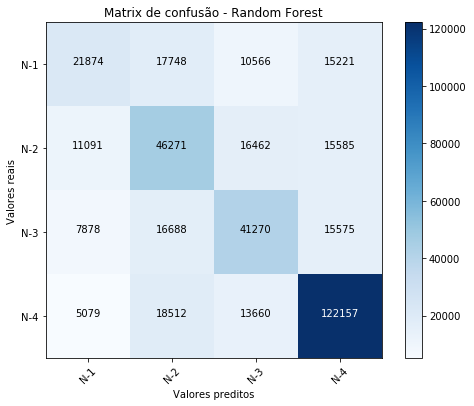

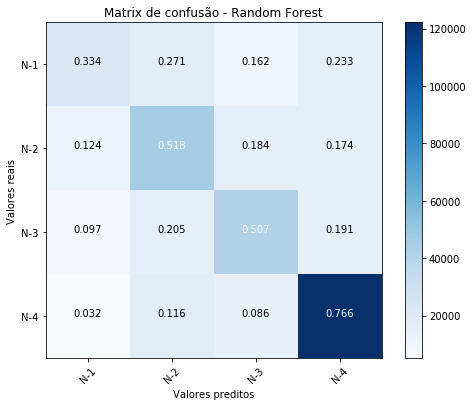

In [76]:
# encoding=utf8  
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

class_names = np.array(['N-1', 'N-2', 'N-3', 'N-4'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion de matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix de confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix de confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, rfc_y_pred_v)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusão - Random Forest')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusão - Random Forest')
fig_name = 'CF_figs/cm_RF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

---

## Support Vector Machine RBF

In [ ]:
from sklearn import svm, datasets

print 'Processing time SVM'
%time svm_rbf = svm.SVC(kernel='rbf', gamma=0.2, C=6, decision_function_shape='ovr').fit(X_train_std, y_train)

print ''
print 'Predict time'  
%time rbf_y_pred = svm_rbf.predict(X_test_std)
from sklearn.metrics import accuracy_score

print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_test, rbf_y_pred)*100))

In [170]:
accuracy_score(y_test, rbf_y_pred)

0.8774077125259896

In [171]:
print 'Predict time'  
%time rbf_y_pred_v = svm_rbf.predict(X_validate_std)
from sklearn.metrics import accuracy_score
print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_validate, rbf_y_pred_v)*100))

Predict time
Wall time: 32.6 s
SVM-RBF accuracy:---------->71.03 %


In [172]:
(accuracy_score(y_validate, rbf_y_pred_v))

0.7102610807528841

In [174]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, rbf_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')
confusion_matrix
cm = confusion_matrix
cm

array([[3.5062e+04, 2.4950e+03],
       [1.1821e+04, 3.2000e+01]])

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, rbf_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')

In [ ]:
confusion_matrix

In [50]:
FN = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FP = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [51]:
TPR*100 # Sensitivity

array([ 59.89,   4.27,  61.09,  16.2 ,  31.69,  42.31])

In [52]:
TNR*100 # Specificity

array([ 88.04,  97.06,  75.72,  96.61,  82.9 ,  83.62])

In [53]:
PPV*100 # Precision

array([ 42.74,  10.93,  34.86,  34.02,  45.66,  40.38])

In [54]:
ACC*100 # Accuracy

array([ 84.39,  89.84,  73.16,  88.78,  66.93,  75.04])

In [55]:
sum(ACC)/6*100

79.689084809237727

In [55]:
# encoding=utf8  
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion de matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix de confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix de confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, rbf_y_pred_v)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusão - SVM-RBF')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusão - SVM-RBF')
fig_name = 'CF_figs/cm_SVM-RBF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

NameError: name 'rbf_y_pred_v' is not defined

## Support Vector Machine Poly

In [ ]:
from sklearn import svm, datasets

print 'Processing time Polynomial'
#%time svm = svm.SVC(kernel='poly', degree=2, coef0=4.7, C=48.9, decision_function_shape='ovr').fit(X_train_std, y_train)
%time svm_poly = svm.SVC(kernel='poly', degree=2,  C=500).fit(X_train_std, y_train)


Processing time Polynomial


In [ ]:
#poly_y_pred = svm_poly.predict(X_test_std)

print 'Predict time'  
%time poly_y_pred = svm_poly.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('SVM-Polynomial accuracy:--->%.2f %%' % (accuracy_score(y_test, poly_y_pred)*100))
        

In [ ]:
print 'Predict time'  
%time poly_y_pred_v = svm_poly.predict(X_validate_std)
from sklearn.metrics import accuracy_score
print ('SVM-Polynomial accuracy:---------->%.2f %%' % (accuracy_score(y_validate, poly_y_pred_v)*100))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, poly_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')
confusion_matrix
cm = confusion_matrix
cm

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, poly_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')

In [ ]:
confusion_matrix

In [ ]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
TPR*100 # Sensitivity

In [ ]:
TNR*100 # Specificity

In [ ]:
PPV*100 # Precision

In [ ]:
ACC*100 # Accuracy

In [ ]:
sum(ACC)/6*100

In [ ]:
# encoding=utf8  
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion de matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix de confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix de confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, poly_y_pred_v)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusão - SVM-Poly')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusão - SVM-Poly')
fig_name = 'CF_figs/cm_SVM-Poly.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

---

## KNeigbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=2, weights = 'distance', algorithm = 'auto', p = 1)
knc = knc.fit(X_train_std, y_train)
print''

print 'Predict time'
%time pred = knc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score



print ('ClassifyKN accuracy:---------->%.2f %%' % (accuracy_score(y_test, pred)*100))

In [81]:
accuracy_score(y_test, pred)*100

70.42095014099111

In [82]:
%time pred = knc.predict(X_validate_std)
accuracy_score(y_validate, pred)*100

40.215143949442144

## Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred)
confusion_matrix = confusion_matrix.astype('float')

In [84]:
confusion_matrix

array([[  2.73e+04,   4.75e+03,   2.00e+01,   3.09e+03,   1.06e+03,
          3.72e+03],
       [  1.06e+04,   1.60e+03,   6.00e+00,   3.57e+03,   2.53e+03,
          5.70e+03],
       [  3.58e+04,   5.48e+03,   2.60e+01,   4.52e+03,   3.18e+03,
          4.96e+03],
       [  1.57e+04,   2.55e+03,   1.10e+01,   6.00e+03,   2.24e+03,
          3.45e+03],
       [  4.22e+04,   6.18e+03,   2.60e+01,   1.75e+04,   8.46e+03,
          2.16e+04],
       [  2.57e+04,   2.89e+03,   1.10e+01,   1.80e+04,   4.18e+03,
          1.31e+04]])

In [85]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [86]:
TPR*100 # Sensitivity

array([  6.83e+01,   6.68e+00,   4.82e-02,   2.00e+01,   8.81e+00,
         2.05e+01])

In [87]:
TNR*100 # Specificity

array([ 51.45,  92.3 ,  99.97,  83.21,  93.76,  83.83])

In [88]:
PPV*100 # Precision

array([ 17.34,   6.82,  26.  ,  11.41,  39.04,  24.97])

In [89]:
ACC*100 # Accuracy

array([ 53.64,  85.63,  82.45,  77.06,  67.26,  70.68])

In [90]:
sum(ACC)/6*100

72.784951410019673

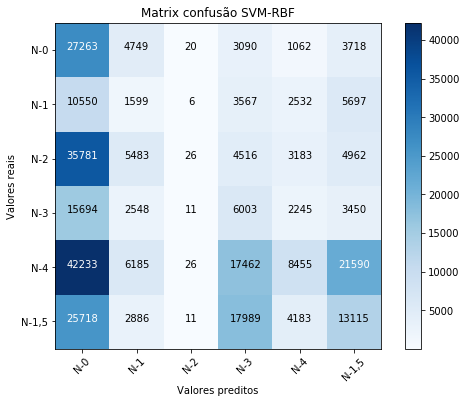

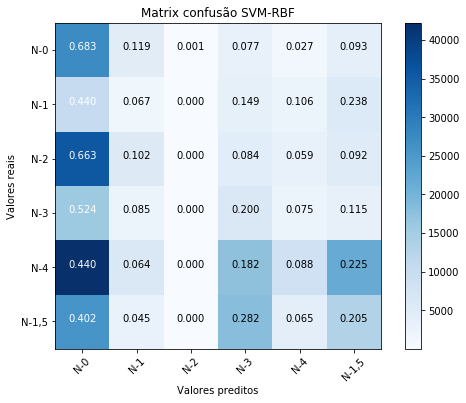

In [91]:
# encoding=utf8  
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix confusão SVM-RBF')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix confusão SVM-RBF')
fig_name = 'cm_SVM-RBF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()